## Exploratory Data Analysis (EDA)

In [1]:
import sys
sys.path.append("..")

import module.utils.general_utils as general_utils
import module.utils.data_prepare_utils as data_prepare_utils
import module.utils.eda_utils as eda_utils
import time

In [2]:
start = time.time()

In [3]:
TARGET = "label"
TRAIN_FILE_PATH = "../data/train_df.csv"
TARGET_ENCODE_RANDOM_STATE = 42

#### 1. Create a copy of train dataset for exploration

In [4]:
train_df = general_utils.read_csv(TRAIN_FILE_PATH)


Read CSV file ../data/train_df.csv into DataFrame:
df.head(): 


,uid,task_id,adv_id,creat_type_cd,adv_prim_id,dev_id,inter_type_cd,slot_id,spread_app_id,tags,...,device_price,up_life_duration,up_membership_grade,membership_life_duration,consume_purchase,communication_onlinerate,communication_avgonline_30d,indu_name,pt_d,label
0,1920544,3854,3367,7,207,17,5,11,13,37,...,4,20,-1,-1,2,7^8^9^10^11^12^13^14^15^16^17^18^19^20^21^22^23,10,17,6,0
1,1850503,3903,6370,7,173,52,5,12,69,11,...,2,-1,-1,-1,2,5^6^7^8^9^10^11^12^13^14^15^16^17^18^19^20^21^...,12,50,7,0
2,2157496,1847,6428,6,178,17,5,18,70,39,...,7,20,1,-1,9,0^1^2^3^4^5^6^7^8^9^10^11^12^13^14^15^16^17^18...,13,36,7,0
3,2072043,4125,4468,7,168,37,5,12,44,40,...,2,20,-1,-1,2,6^7^8^9^10^11^12^13^14^15^16^17^18^19^20^21^22^23,11,17,6,0
4,1084626,4811,3326,7,183,29,5,12,86,37,...,3,18,-1,-1,2,7^8^9^10^11^12^13^14^15^16^17^18^19^20^21^22^23,10,17,6,0


df.shape: (670513, 36)


In [5]:
train_df_eda = train_df.copy()
del train_df

#### 2. Describe basic information of attributes 

In [6]:
eda_utils.check_out_general_info(train_df_eda)


General information of DataFrame:
df.shape:
(670513, 36)
df.head():


,uid,task_id,adv_id,creat_type_cd,adv_prim_id,dev_id,inter_type_cd,slot_id,spread_app_id,tags,...,device_price,up_life_duration,up_membership_grade,membership_life_duration,consume_purchase,communication_onlinerate,communication_avgonline_30d,indu_name,pt_d,label
0,1920544,3854,3367,7,207,17,5,11,13,37,...,4,20,-1,-1,2,7^8^9^10^11^12^13^14^15^16^17^18^19^20^21^22^23,10,17,6,0
1,1850503,3903,6370,7,173,52,5,12,69,11,...,2,-1,-1,-1,2,5^6^7^8^9^10^11^12^13^14^15^16^17^18^19^20^21^...,12,50,7,0
2,2157496,1847,6428,6,178,17,5,18,70,39,...,7,20,1,-1,9,0^1^2^3^4^5^6^7^8^9^10^11^12^13^14^15^16^17^18...,13,36,7,0
3,2072043,4125,4468,7,168,37,5,12,44,40,...,2,20,-1,-1,2,6^7^8^9^10^11^12^13^14^15^16^17^18^19^20^21^22^23,11,17,6,0
4,1084626,4811,3326,7,183,29,5,12,86,37,...,3,18,-1,-1,2,7^8^9^10^11^12^13^14^15^16^17^18^19^20^21^22^23,10,17,6,0


df.info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 670513 entries, 0 to 670512
Data columns (total 36 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   uid                          670513 non-null  int64 
 1   task_id                      670513 non-null  int64 
 2   adv_id                       670513 non-null  int64 
 3   creat_type_cd                670513 non-null  int64 
 4   adv_prim_id                  670513 non-null  int64 
 5   dev_id                       670513 non-null  int64 
 6   inter_type_cd                670513 non-null  int64 
 7   slot_id                      670513 non-null  int64 
 8   spread_app_id                670513 non-null  int64 
 9   tags                         670513 non-null  int64 
 10  app_first_class              670513 non-null  int64 
 11  app_second_class             670513 non-null  int64 
 12  age                          670513 non-null  int64 
 13  city 

None

df.describe: 


,uid,task_id,adv_id,creat_type_cd,adv_prim_id,dev_id,inter_type_cd,slot_id,spread_app_id,tags,...,list_time,device_price,up_life_duration,up_membership_grade,membership_life_duration,consume_purchase,communication_avgonline_30d,indu_name,pt_d,label
count,6.705130e+05,670513.000000,670513.000000,670513.000000,670513.000000,670513.000000,670513.000000,670513.000000,670513.000000,670513.000000,...,670513.000000,670513.000000,670513.000000,670513.000000,670513.000000,670513.000000,670513.000000,670513.000000,670513.000000,670513.000000
mean,1.618801e+06,3436.849907,3962.506521,6.491079,159.338301,41.588178,4.647442,15.259482,51.956392,34.373923,...,9.212965,3.476514,12.718338,-0.755258,-0.971807,2.582271,11.143823,26.538787,3.985633,0.034493
std,3.574562e+05,1429.346539,1720.331508,1.230390,30.892384,17.423224,0.709862,3.167382,25.118029,8.139520,...,3.640918,1.158070,9.018041,0.658768,0.727763,1.760806,1.644238,11.054697,2.011754,0.182492
min,1.000004e+06,1001.000000,1001.000000,2.000000,101.000000,11.000000,2.000000,11.000000,11.000000,11.000000,...,-2.000000,-1.000000,-1.000000,-1.000000,-1.000000,2.000000,-1.000000,11.000000,1.000000,0.000000
25%,1.309509e+06,2229.000000,2504.000000,6.000000,134.000000,29.000000,5.000000,12.000000,31.000000,34.000000,...,7.000000,3.000000,-1.000000,-1.000000,-1.000000,2.000000,10.000000,17.000000,2.000000,0.000000
50%,1.618056e+06,3370.000000,4040.000000,7.000000,156.000000,37.000000,5.000000,16.000000,53.000000,37.000000,...,9.000000,4.000000,18.000000,-1.000000,-1.000000,2.000000,11.000000,24.000000,4.000000,0.000000
75%,1.929672e+06,4595.000000,5461.000000,7.000000,180.000000,60.000000,5.000000,17.000000,78.000000,40.000000,...,12.000000,4.000000,20.000000,-1.000000,-1.000000,2.000000,12.000000,36.000000,6.000000,0.000000
max,2.237671e+06,5992.000000,7020.000000,9.000000,214.000000,72.000000,5.000000,22.000000,89.000000,42.000000,...,17.000000,7.000000,20.000000,3.000000,20.000000,10.000000,13.000000,52.000000,7.000000,1.000000


#### 3. Checkout duplicate observations

In [7]:
eda_utils.check_out_duplicate_obs(train_df_eda)


Check out duplicate observations:
df.shape:  (670513, 36)
drop_dup_df.shape:  (667734, 36)
Caution: data set contains duplicate observations!!!


#### 4. Checkout missing targets

In [8]:
eda_utils.check_out_missing_target(train_df_eda, TARGET)


Check out observations with missing target:
df.shape:  (670513, 36)
drop_miss_tar_df.shape:  (670513, 36)
No missing-target observations observed in data set.


#### 5. Checkout missingness of attributes

In [9]:
eda_utils.check_out_missingness(train_df_eda)


Check out missingness:
No missing values in data set.


#### 6. Identify numerical and categorical attibutes

In [10]:
numerical_attr_list, categorical_attr_list = eda_utils.split_numerical_categorical_attr(train_df_eda, TARGET)


Split numerical and categorical attributes:
numerical_attr_list: 
['uid', 'task_id', 'adv_id', 'creat_type_cd', 'adv_prim_id', 'dev_id', 'inter_type_cd', 'slot_id', 'spread_app_id', 'tags', 'app_first_class', 'app_second_class', 'age', 'city', 'city_rank', 'device_name', 'device_size', 'career', 'gender', 'net_type', 'residence', 'his_app_size', 'his_on_shelf_time', 'app_score', 'emui_dev', 'list_time', 'device_price', 'up_life_duration', 'up_membership_grade', 'membership_life_duration', 'consume_purchase', 'communication_avgonline_30d', 'indu_name', 'pt_d']
categorical_attr_list: 
['communication_onlinerate']



- Based on the data type of attribute columns, there is only one categorical attribute `communication_onlinerate`.
- However, some 'numerical' attributes seem to be categorical from the field explanation (see `data_fields.json` in repo) and domain knowledge. E.g. `gender` and `net_type` (network status) can not be numerical.
- After checking the original dataset, it seems the data has been label-encoded, which means categories in categorical attributes are replaced with numbers. E.g. 'male' and 'female' normally in `gender` are replaced with 1 and 2.
- These pre-encoded categorical attributes have no statistical meaning with their number. These numbers can be actually seen as another type of 'label'.
- In addition, directly label-encoding categorical attributes may be not suitable sometimes. It could be suitable if the attribute is ordinal, yet label-encoding nominal attributes is meaningless, as there is no actual numerical relationship between them.
- Thus, we will look at the distribution of all 'numerical' attributes and find actually categorical ones within them.



Histogram plots for numerical attributes:


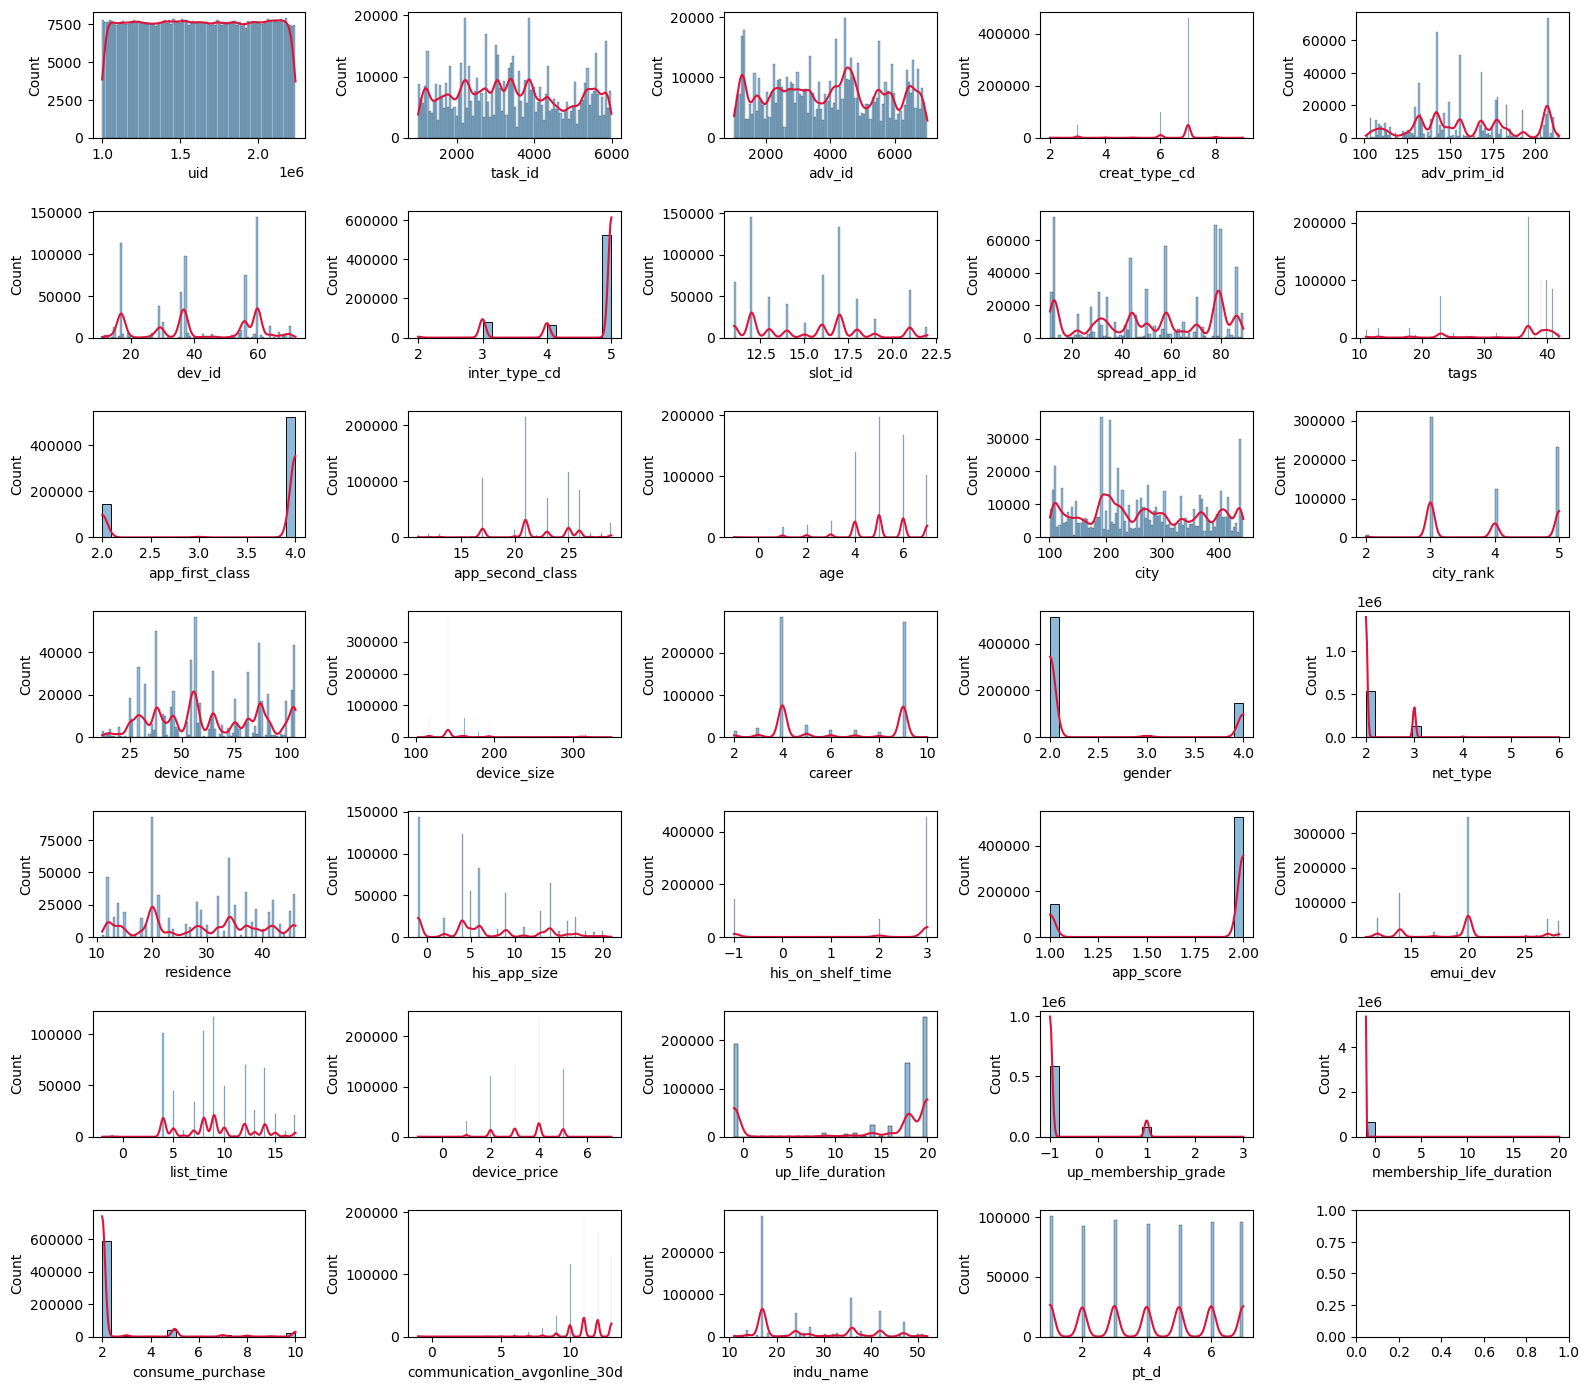

In [11]:
eda_utils.hist_plot_for_numerical(train_df_eda, numerical_attr_list, bins='auto')


- We can also check the cardinality to find possible pre-encoded categorical attributes:


In [12]:
eda_utils.attr_unique_counts(train_df_eda)

,attribute,unique counts
0,uid,349783
1,task_id,3565
2,adv_id,4120
3,creat_type_cd,8
4,adv_prim_id,101
5,dev_id,55
6,inter_type_cd,4
7,slot_id,12
8,spread_app_id,69
9,tags,30



- The histogram plots reveal some possible pre-encoded attributes.
- Some are clearly nominal: IDs(`uid`, `task_id`, etc), `city`, `career`, `gender`, etc.
- Some are like ordinal: `age`, `city_rank`, etc. However, they may also be pre-aggregated. For instance, there are only 8 unique values of `age`, which is not realistic.
- After communicating with the professor, we would treat all categorical attributes as the same type rather than splitting into nominal and ordinal ones.
- After looking into the original dataset, **all attributes are pre-encoded and no one can be defined as numerical**. It may be for the consideration of privacy.
- Thus, we would change the former attribute split and target encode categorical attributes.


In [13]:
numerical_attr_list = []
numerical_attr_list

[]

In [14]:
categorical_attr_list = [attr for attr in train_df_eda.columns if attr not in numerical_attr_list and attr != TARGET]
categorical_attr_list

['uid',
 'task_id',
 'adv_id',
 'creat_type_cd',
 'adv_prim_id',
 'dev_id',
 'inter_type_cd',
 'slot_id',
 'spread_app_id',
 'tags',
 'app_first_class',
 'app_second_class',
 'age',
 'city',
 'city_rank',
 'device_name',
 'device_size',
 'career',
 'gender',
 'net_type',
 'residence',
 'his_app_size',
 'his_on_shelf_time',
 'app_score',
 'emui_dev',
 'list_time',
 'device_price',
 'up_life_duration',
 'up_membership_grade',
 'membership_life_duration',
 'consume_purchase',
 'communication_onlinerate',
 'communication_avgonline_30d',
 'indu_name',
 'pt_d']

#### 7. EDA for categorical attributes


- Distribution and cardinality for categorical attributes has been analyzed above. 
- For most machine learning models, categorical attributes should be encoded to numerical ones to be accepted by the model. 
- As the high number of unique values in some attributes, Target-Encoding rather than OneHot-Encoding should be applied.


#### 8. Target Encode categorical attributes

In [15]:
train_df_eda_encoded = data_prepare_utils.target_encode_categorical(train_df_eda, categorical_attr_list, TARGET, TARGET_ENCODE_RANDOM_STATE)


Target encode categorical attributes:
encoded_df.head():


,uid,task_id,adv_id,creat_type_cd,adv_prim_id,dev_id,inter_type_cd,slot_id,spread_app_id,tags,...,device_price,up_life_duration,up_membership_grade,membership_life_duration,consume_purchase,communication_onlinerate,communication_avgonline_30d,indu_name,pt_d,label
0,0.034492,0.070409,0.070409,0.037742,0.049064,0.047209,0.035773,0.022059,0.049064,0.043827,...,0.027475,0.029346,0.035535,0.034503,0.035117,0.031091,0.034960,0.042022,0.034988,0
1,0.000000,0.021977,0.021977,0.037573,0.019656,0.020026,0.035812,0.065339,0.019656,0.015139,...,0.044027,0.039746,0.035509,0.034501,0.035023,0.036401,0.034924,0.019083,0.035769,0
2,0.034494,0.091728,0.091728,0.025173,0.046442,0.047362,0.035812,0.033378,0.046442,0.041489,...,0.070791,0.029267,0.027104,0.034501,0.029143,0.031876,0.030536,0.042706,0.035769,0
3,0.000000,0.050517,0.050517,0.037652,0.028653,0.034907,0.035822,0.066133,0.030596,0.038812,...,0.044360,0.029159,0.035542,0.034503,0.035097,0.034432,0.033253,0.042086,0.034717,0
4,0.000000,0.039757,0.039757,0.037690,0.062824,0.059133,0.035804,0.065554,0.055060,0.043966,...,0.036839,0.032673,0.035500,0.034500,0.035127,0.031249,0.035043,0.041996,0.034723,0


#### 9. EDA for numerical attributes

**9.1 Distribution for numerical attributes**

In [16]:
numerical_attr_list += categorical_attr_list
numerical_attr_list

['uid',
 'task_id',
 'adv_id',
 'creat_type_cd',
 'adv_prim_id',
 'dev_id',
 'inter_type_cd',
 'slot_id',
 'spread_app_id',
 'tags',
 'app_first_class',
 'app_second_class',
 'age',
 'city',
 'city_rank',
 'device_name',
 'device_size',
 'career',
 'gender',
 'net_type',
 'residence',
 'his_app_size',
 'his_on_shelf_time',
 'app_score',
 'emui_dev',
 'list_time',
 'device_price',
 'up_life_duration',
 'up_membership_grade',
 'membership_life_duration',
 'consume_purchase',
 'communication_onlinerate',
 'communication_avgonline_30d',
 'indu_name',
 'pt_d']


Histogram plots for numerical attributes:


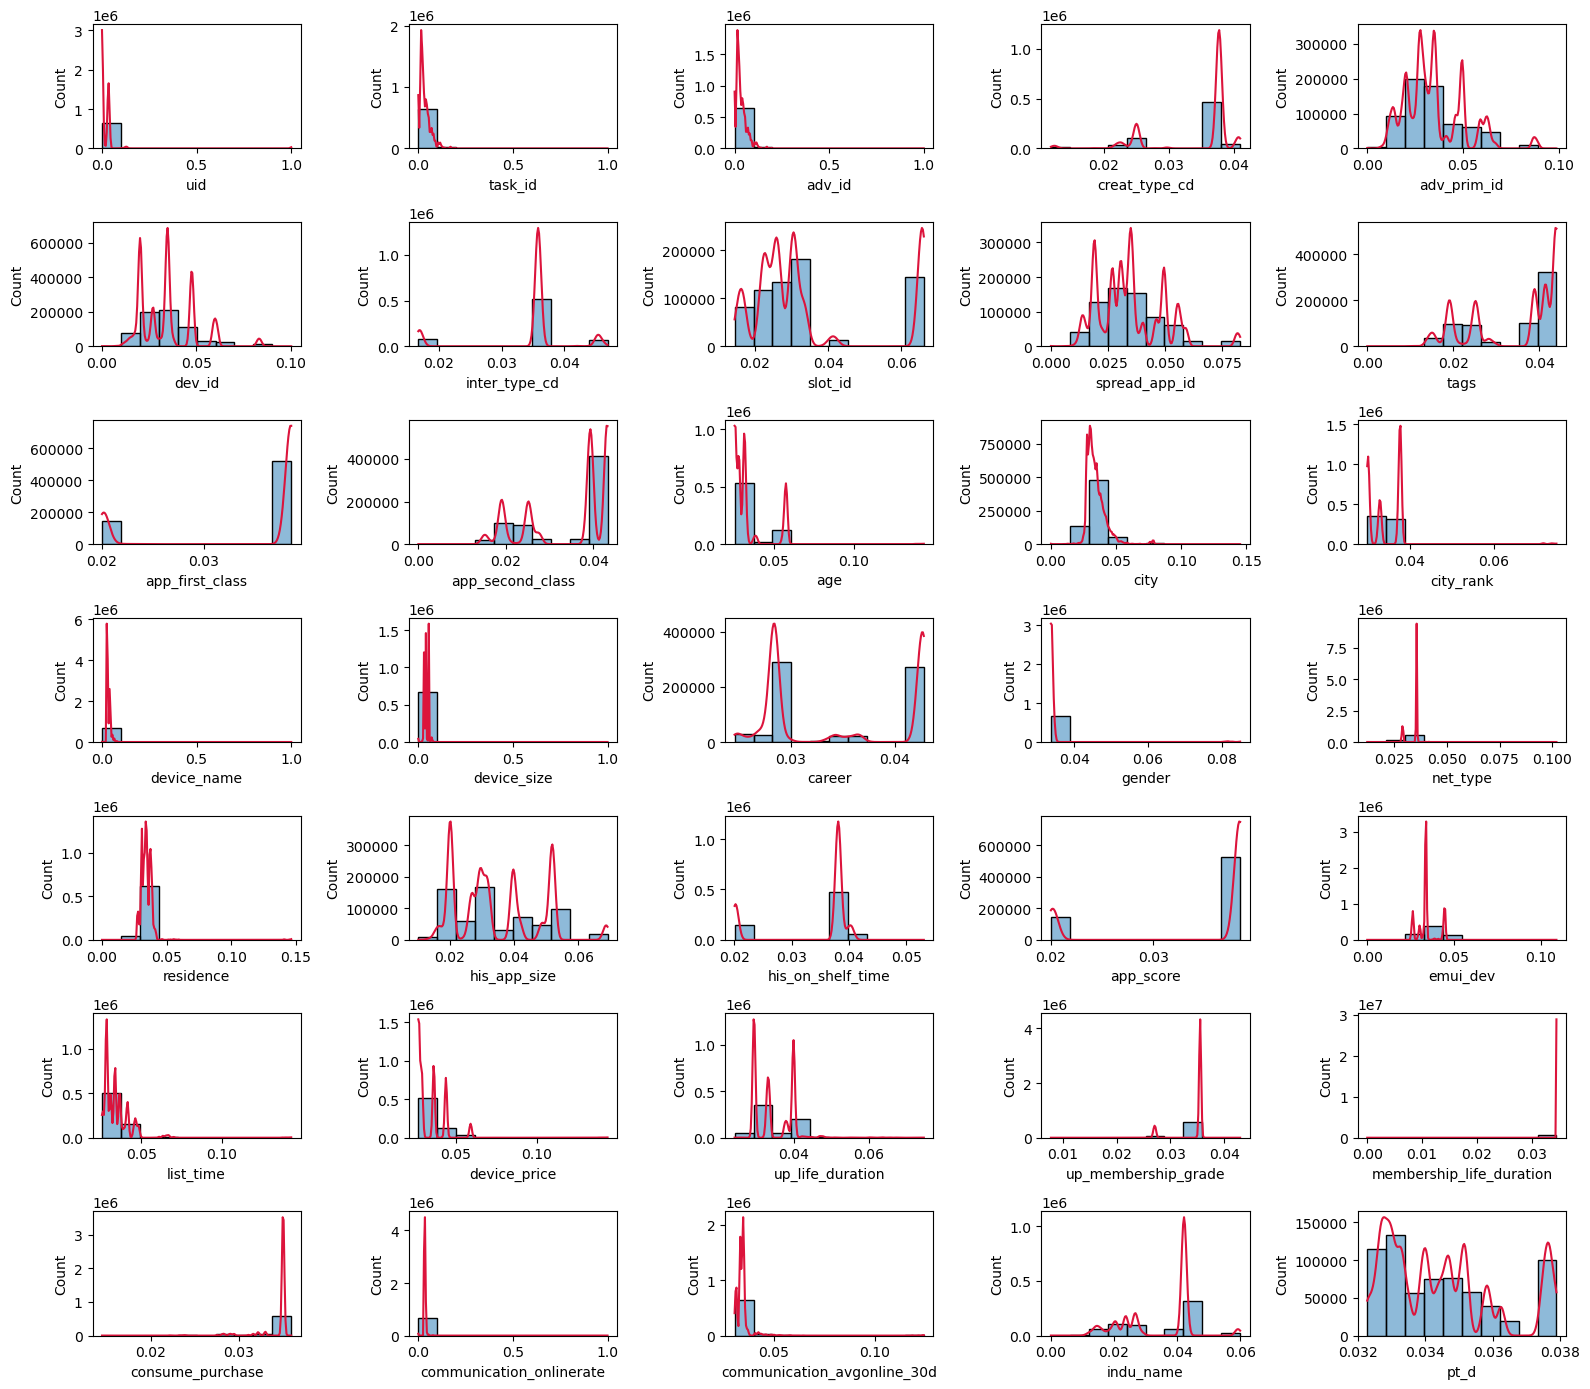

In [17]:
eda_utils.hist_plot_for_numerical(train_df_eda_encoded, numerical_attr_list, bins=10)


- The distribution of encoded attributes becomes smoother than before, as target encoding is less sensitive to extreme values.


**9.2 Outlier detection for numerical attribtues**

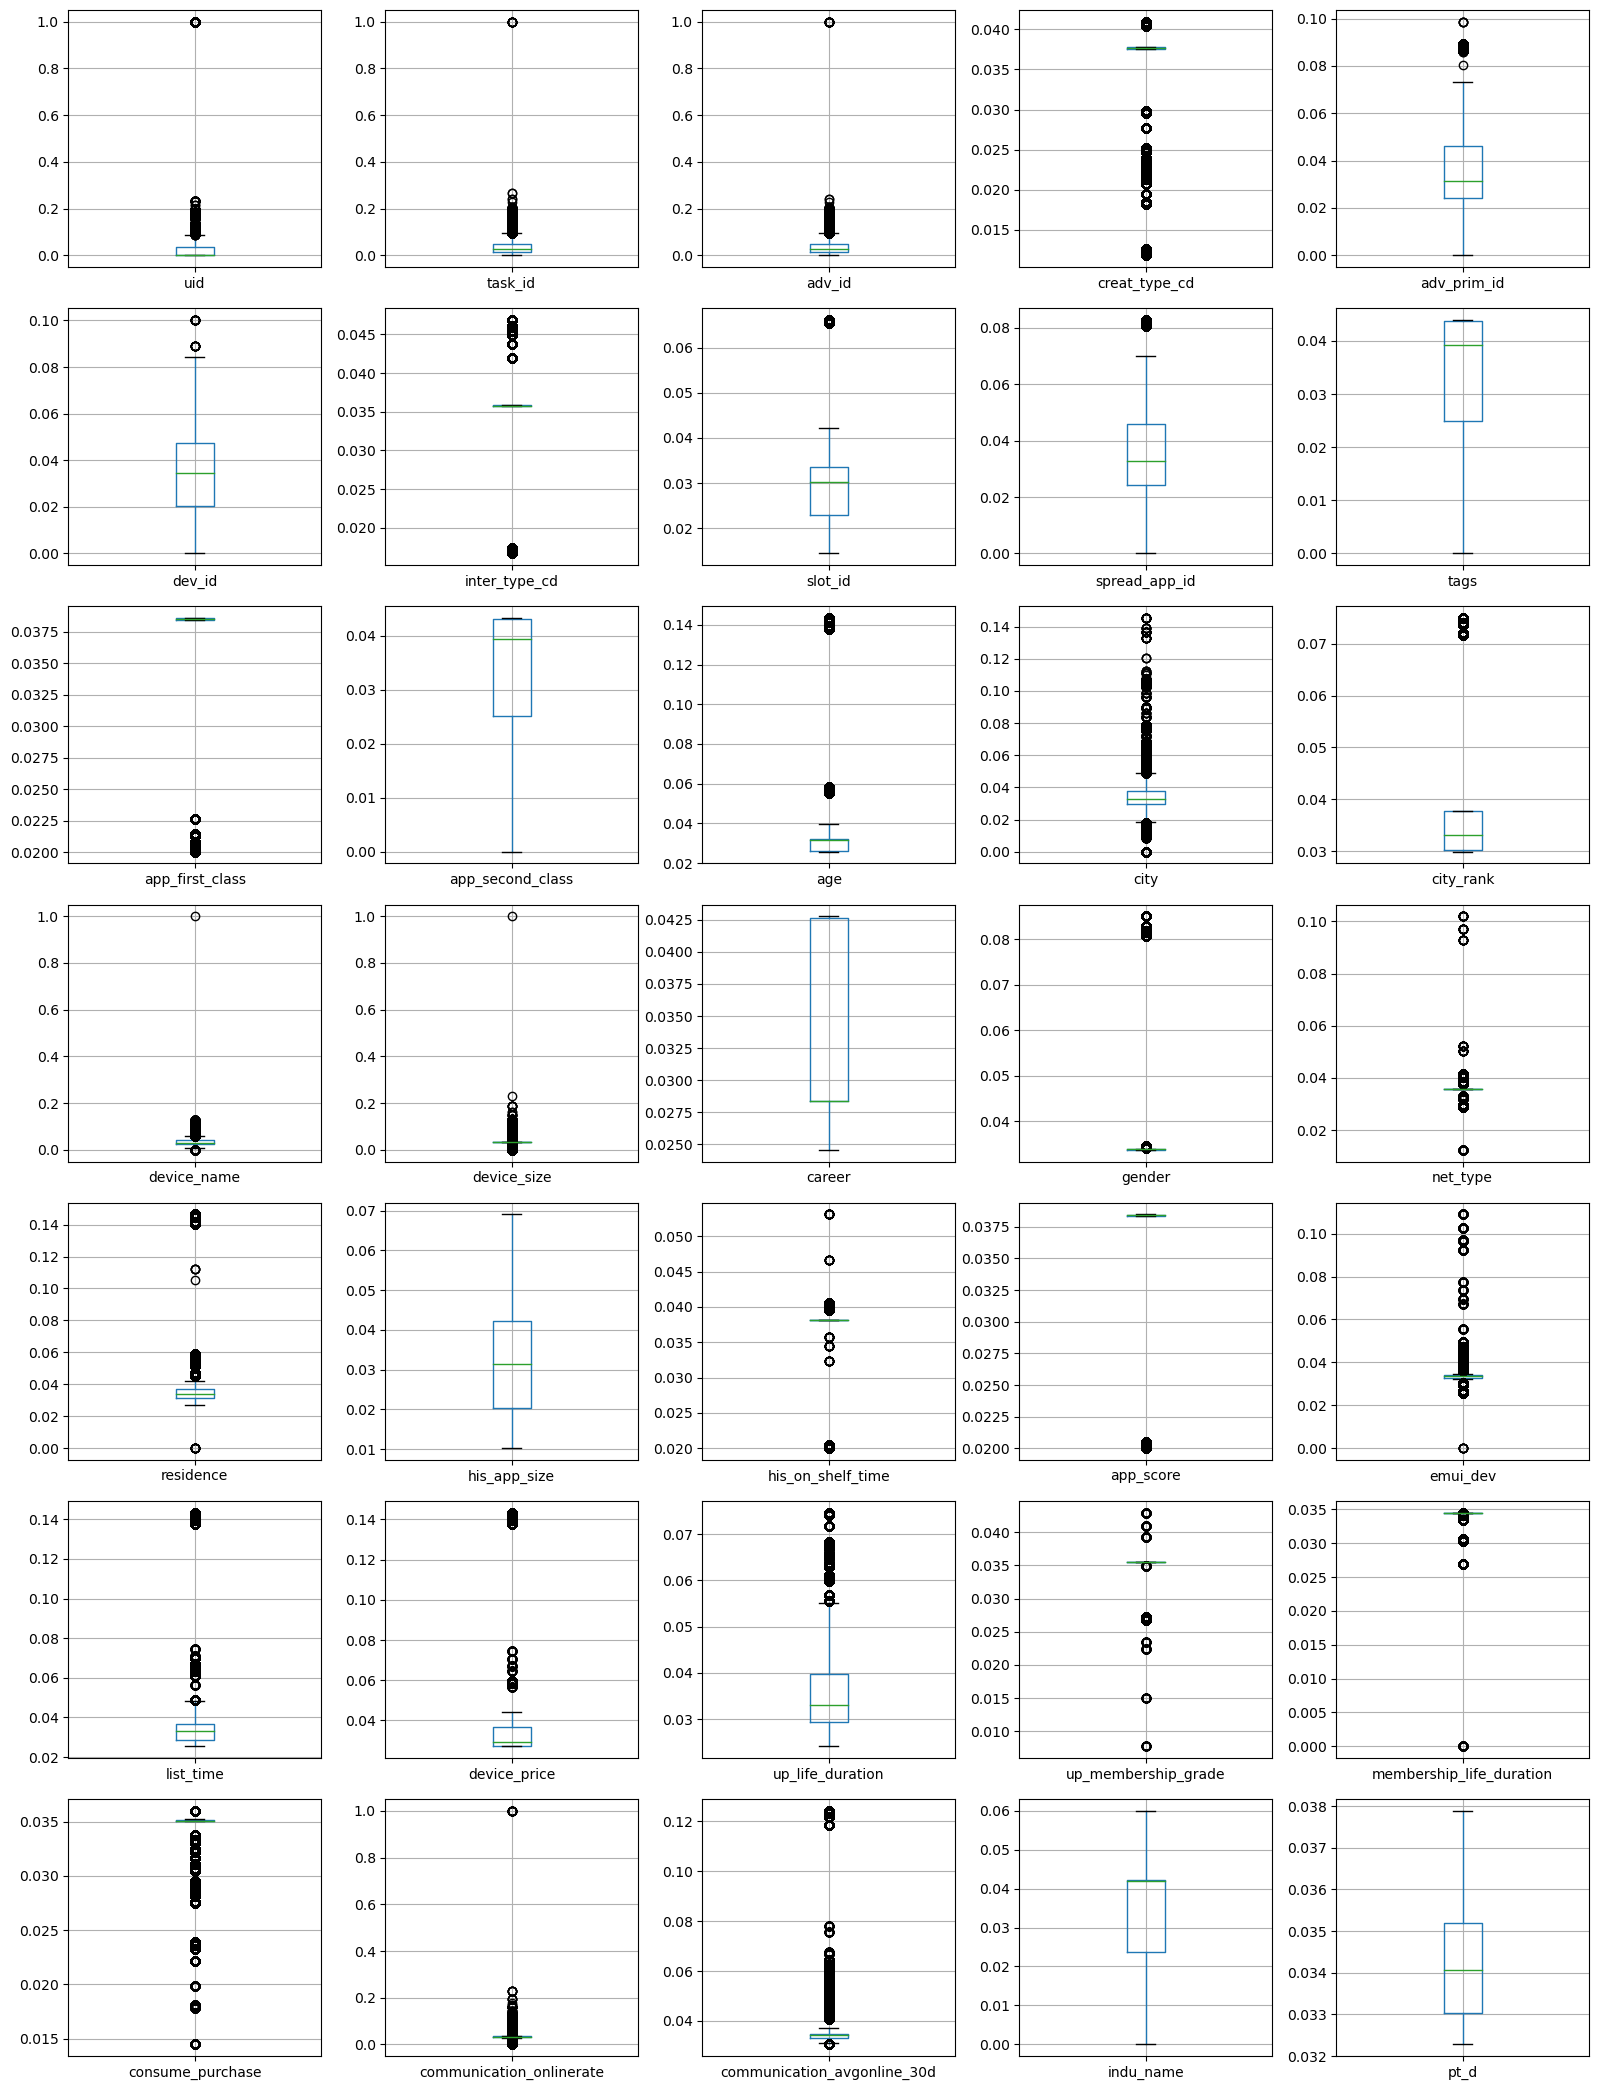

In [18]:
eda_utils.box_plot_for_numerical(train_df_eda_encoded, numerical_attr_list)

In [19]:
eda_utils.tukeys_method_for_numerical(train_df_eda_encoded, numerical_attr_list)


Implement Tukey's fences to identify outliers based on the Inter Quartile Range (IQR) method:


,Attribute,Outliers Prob Count,Outliers Prob Fraction,Outliers Poss Count,Outliers Poss Fraction
24,emui_dev,235889,0.351804,288520,0.430297
16,device_size,220894,0.329440,235501,0.351225
22,his_on_shelf_time,213902,0.319012,213902,0.319012
3,creat_type_cd,209288,0.312131,209288,0.312131
18,gender,156068,0.232759,156068,0.232759
6,inter_type_cd,147892,0.220565,147892,0.220565
10,app_first_class,147744,0.220345,147744,0.220345
23,app_score,144303,0.215213,144303,0.215213
19,net_type,137291,0.204755,137291,0.204755
12,age,120945,0.180377,120945,0.180377



- Outlier fraction in all attributes decreased after target encoding. This is reasonable as target encoding can kind of smooth extreme values and make the feature less "outliery".
-  However, there are still some attributes with a significantly high outlier fraction (>20%).
- We will not decide to drop them simply in this step. Considering the domain knowledge, device size, creat type, gender, etc. may be useful predictors. 


**9.3 Correlations and associations for numerical attribtues**


Heatmap visualizing correlation between numerical attributes:


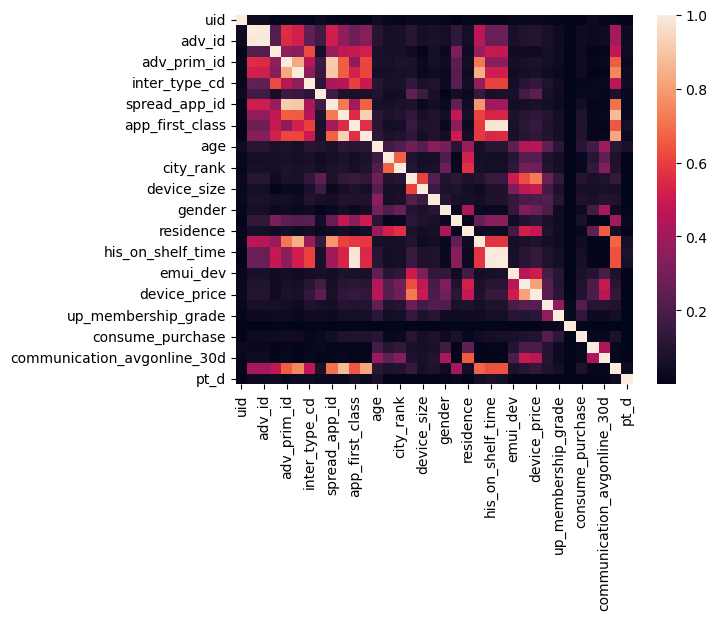


Matrix visualizing correlation (>0.7) between numerical attributes:


,correlation
his_on_shelf_time with app_score,0.994900
task_id with adv_id,0.988864
app_first_class with app_score,0.986854
app_first_class with his_on_shelf_time,0.981297
tags with app_second_class,0.928836
adv_prim_id with spread_app_id,0.915533
dev_id with spread_app_id,0.905726
tags with indu_name,0.871444
dev_id with his_app_size,0.842503
adv_prim_id with dev_id,0.826333


In [20]:
eda_utils.corr_for_numerical(train_df_eda_encoded, numerical_attr_list, threshold=0.7)


- There are a remarkable number of attribute pairs with a high correlation (>0.7). We will consider drop one from the pair of them.
- We will look at their usefulness for target to help determine which one to drop.


**9.4 VIF of attributes**

In [21]:
eda_utils.print_vifs(train_df_eda_encoded, numerical_attr_list)


Investigate multi co-linearity: calculate variance inflation factors (VIF):
Prepare DataFrame for vif calculation:
Added a bias term to the data frame to construct the design matrix for assessment of vifs.
Scale the attributes - but not the bias term


,attribute,vif
24,app_score,144.420534
23,his_on_shelf_time,101.866003
2,task_id,45.590773
3,adv_id,45.156535
11,app_first_class,41.128581
9,spread_app_id,15.137149
10,tags,12.168223
6,dev_id,10.807945
12,app_second_class,8.192821
5,adv_prim_id,7.342498



- There are some very high VIFs (>5), which reveals the existence of multi co-linearity.
- We will consider drop some of them combing with the correlation analysis results.


**9.5 Usefulness of attributes for the task**

In [22]:
eda_utils.corr_target_for_numerical(train_df_eda_encoded, TARGET, numerical_attr_list)


Calculate the correlation between each attribute and the target:


,correlation
membership_life_duration,0.001988
pt_d,0.007790
consume_purchase,0.009182
net_type,0.013763
up_membership_grade,0.015004
communication_onlinerate,0.017608
city,0.024443
city_rank,0.027533
up_life_duration,0.027719
gender,0.029381



- The correlation of each attribute with the target is not high enough. This is reasonable for a large-number attributes model.
- We can combine this result with the above multi-correlation results to determine attributes to be dropped.


In [23]:
eda_utils.variance_for_numerical(train_df_eda_encoded, numerical_attr_list)


Calculate the variance of each attribute:


,variance
membership_life_duration,2.115851e-07
pt_d,2.813222e-06
consume_purchase,3.368068e-06
net_type,7.537379e-06
up_membership_grade,7.694026e-06
city_rank,2.557131e-05
up_life_duration,2.825342e-05
gender,2.907762e-05
communication_avgonline_30d,3.357079e-05
emui_dev,3.562375e-05



- The variance for all attributes is quite tiny with the biggest one < 0.01.
- This may due to the highly unbalanced target variable, which leads the encoded attributes tend to be around 0.
- This may also due to the high cardinality of attributes, which makes the estimated means during target encoding become noisy.
- Low-variance attributes do not represent useless as they may still carry useful information.


#### Identify the promising transformations


- Deal with duplicate observations.
- No missingness in data set.
- Targe encode categorical attributes.
- Drop useless-for-ML attributes
    -  `uid`. Its cardinality is very high which is around half of the total observation counts. Its meaning is simply a unique identification for users, and will be meaningless in an ML model.
- Drop highly correlated attributes.
    - `app_score`. It has a very high VIF (144.4), a very high correlation with `his_on_shelf_time` (99.5%) and `app_first_class` (98.7%), and a high outlier fraction (21.5%). Its meaning is the rating score of app, but it has been encoded to only 2 values, which possibly leads to the loss of information.
    - `his_on_shelf_time`. It has a very high VIF (101.9), a very high correlation with `app_score` (99.5%) and `app_first_class` (98.1%), and a high outlier fraction (31.9%). Its meaning is release time but also has been encoded to only 4 values.
    - `task_id`. It has a very high VIF (45.6) and a very high correlation with `adv_id` (98.9%). We can drop one from the pair.
    - `spread_app_id`. It has a high VIF (15.1) and very high correlation with `adv_prim_id` (91.6%), `dev_id` (90.6%), `his_app_size` (78.8%), and `tags` (72.1%).
    - `tags`. It has a high VIF (12.2) and a very high correlation with `app_second_class` (92.9%), `indu_name` (87.1%) and `spread_app_id` (72.1%).
    - `dev_id`. It has a high VIF (10.8) and a very high correlation with `spread_app_id` (90.6%), `his_app_size` (84.3%), `adv_prim_id` (82.6%), and `indu_name` (74.8%).


In [24]:
attrs_to_drop = ['uid', 'app_score', 'his_on_shelf_time', 'task_id', 'spread_app_id', 'tags', 'dev_id']
attrs_to_drop

['uid',
 'app_score',
 'his_on_shelf_time',
 'task_id',
 'spread_app_id',
 'tags',
 'dev_id']

In [25]:
end = time.time()
print(f'Script run time: {(end - start)/60} minutes')

Script run time: 1.936465565363566 minutes
